# linear regression - assumptions
1. linearity - relationship between dependent and independent variables
2. Error has zero mean
3. __homoscedasticity__ (constant variance) of the errors
    (-) versus the predictions
    (-) versus any independent variable
4. Errors are uncorrelated (time series)
5. normality of the error distribution - Errors are normally distributed
  
If any of these assumptions is violated then the forecasts, confidence intervals, and scientific insights yielded by a regression model may be inefficient or seriously biased or misleading.  

## Homoscedasticity

- Take a look at its Greek roots.

> - homo ... means (same)
> - schedastic ... means (scatter)

- So, homoscedasticity literally means“ having the same scatter.” In terms of your data, that simply translates into having data values that are scattered, or spread out, to about the same extent.

> One of the important assumptions of linear regression is that, there should be __no heteroscedasticity__ of residuals. In simpler terms, this means that the variance of residuals should not increase with fitted values of response variable.

- This assumption means that the variance around the regression line is the same for all values of the predictor variable (X). 

- The plot shows a __violation of this assumption__

- For the lower values on the X-axis, the points are all very near the regression line. For the higher values on the X-axis, there is much more variability around the regression line.

> Homoscedasticity is just a fancy word for "equal variances". Homo/Heteroscedasticity is a hard word to pronounce!! But not a difficult concept to understand.

>For example: _annual income_ might be a heteroscedastic variable when predicted by age, because most teens aren't flying around in jets or buying companies or running companies as CEOs etc.

> More commonly, teen workers earn close to the minimum wage, so there isn't a lot of variability during the teen years. 

> However, as teens turn into 20-somethings, and then into 30-somethings, and then into 40-something... some will tend to shoot-up the tax brackets, while others will increase more gradually (or perhaps not at all, unfortunately).

In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# These are for running the model and conducting model diagnostics

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy import stats
from statsmodels.compat import lzip


from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

# import the ML algorithm
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

### fetching dataset

In [2]:
insurance_data=pd.read_csv('insurance.csv')
adv_data=pd.read_csv('Advertising.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
adv_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Lets goo with Insurance data now we are doing EDA

In [5]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values present now we will look for column wise unique values  

In [6]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
print(insurance_data['age'].unique())
print(insurance_data['sex'].unique())
print(insurance_data['bmi'].unique())
print(insurance_data['children'].unique())
print(insurance_data['smoker'].unique())
print(insurance_data['region'].unique())
print(insurance_data['charges'].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
['female' 'male']
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505


we can clearly see that there are two categorical column now we will be dummyfying these columns 

In [8]:
insurance_data.shape

(1338, 7)

In [9]:
insurance_data['sex']=insurance_data['sex'].replace({'female':0,'male':1})
insurance_data['smoker']=insurance_data['smoker'].replace({'no':0,'yes':1})

In [11]:
insurance_data=pd.get_dummies(insurance_data)

In [12]:
insurance_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [13]:
feature_columns_insuranceData=['age','sex','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']

In [14]:
X=insurance_data[feature_columns_insuranceData]
y=insurance_data['charges']

In [38]:
model=smf.ols("charges ~ age + bmi + sex + smoker + children + region_northwest + region_southeast + region_southwest", 
                data=insurance_data ).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:44:23   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
sex               -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker            2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
children           475.5005    137.804      3.451      0.001     205.163     745.838
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

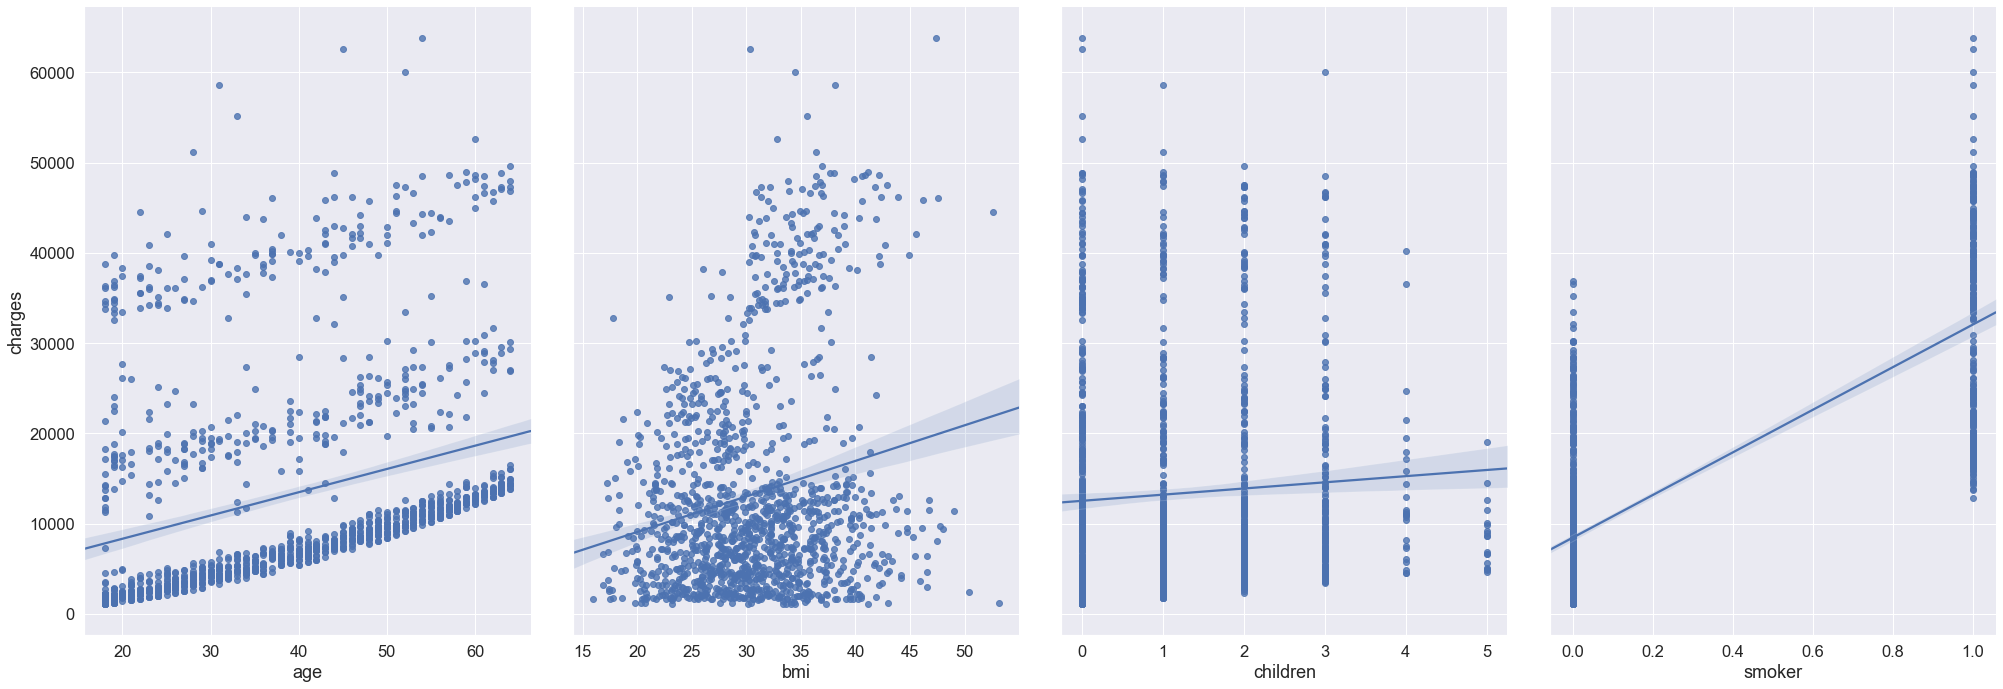

In [26]:
#for assuption 1

sns.pairplot(insurance_data,x_vars=['age','bmi','children','smoker']
            ,y_vars='charges',height=10,aspect=0.7,kind='reg',
            )

#### Now we are targetting about finding the hypothesis tesing about weather the data is hetroscadicity or homoscadicityfor that we use following test 
1. Bruce Pegan Test
2. Brown-Forsythe test
3. Levene’s test
4. Bruesch-Pagan test, or
5. Cook-Weisberg test

for Now we are taking only Bruce pegan Test 

In [27]:

model_sk_insurance_data=LinearRegression()
model_sk_insurance_data.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_ins_pred=model_sk_insurance_data.predict(X)
residual=y-y_ins_pred

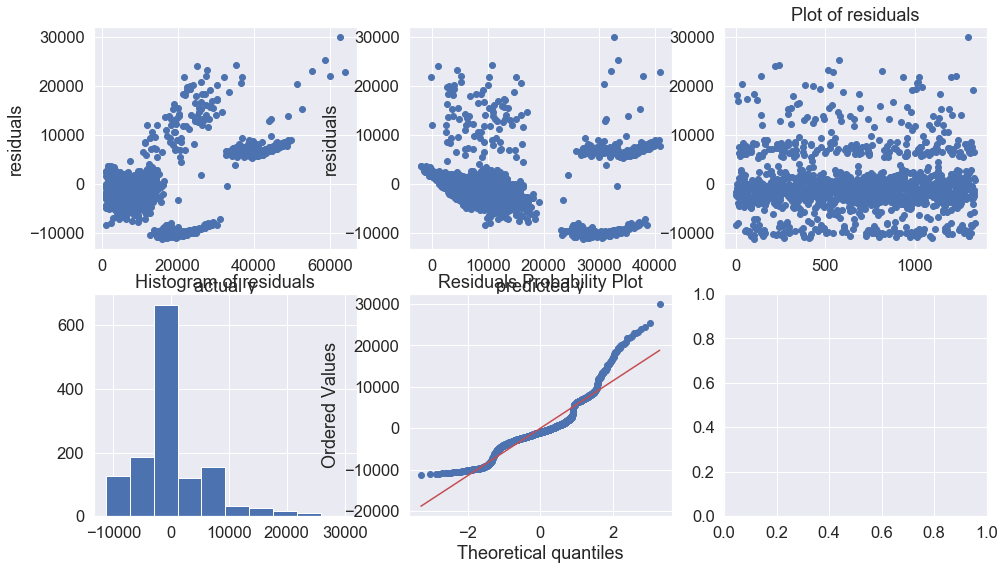

In [44]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3 , figsize=(16, 9))

ax1.scatter(y, residual)
ax1.set_xlabel('actual y')
ax1.set_ylabel('residuals')

ax2.scatter(y_ins_pred, residual)
ax2.set_xlabel('predicted y' )
ax2.set_ylabel('residuals' )

# scatter plot of residuals
ax3.scatter(range(len(residual)), residual)
ax3.set_title('Plot of residuals')

# histogram plot (residuals)
ax4.hist(residual)
ax4.set_title('Histogram of residuals')

stats.probplot(residual, plot= ax5)
ax5.set_title("Residuals Probability Plot");

H0 states that no Hetroscadicity
H1 states that There is Hetroscadicity

if p val is >0.005 we reject null hypothesis

In [41]:
sms.het_breuschpagan(residual,model.model.exog)

(121.74360137569046,
 1.4467175539177552e-22,
 16.628612027375475,
 1.1456058246336557e-23)

This states that the is Ho is not rejected since value of p is 1.4467 e-22 which is very very small compared to 0.005 so Ho is not rejected there is homoscadicity in model 

#### NOrmality Test 

In [45]:
# normality test
stat, p = shapiro(residual)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.899, p=0.000
Sample does not look Gaussian (reject H0)


In [47]:
# normality test
stat, p = normaltest(residual)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=300.366, p=0.000
Sample does not look Gaussian (reject H0)


In [49]:
# Kolmogorov-Smirnov test (for normality)
stats.kstest(residual, 'norm')

KstestResult(statistic=0.6263077931301486, pvalue=0.0)